In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install pycaret

     |████████████████████████████████| 264 kB 5.1 MB/s 
     |████████████████████████████████| 167 kB 38.8 MB/s 
     |████████████████████████████████| 111 kB 66.8 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 271 kB 47.1 MB/s 
     |████████████████████████████████| 6.8 MB 52.8 MB/s 
     |████████████████████████████████| 1.7 MB 76.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 1.3 MB 67.7 MB/s 
     |████████████████████████████████| 14.6 MB 54.7 MB/s 
     |████████████████████████████████| 2.0 MB 51.4 MB/s 
     |████████████████████████████████| 248 kB 78.0 MB/s 
     |████████████████████████████████| 80 kB 8.3 MB/s 
     |████████████████████████████████| 102 kB 59.5 MB/s 
     |████████████████████████████████| 10.1 MB 10.6 MB/s 
     |████████████████

In [20]:
import pandas as pd
from pycaret.classification import *
from sklearn.metrics import log_loss

In [19]:
train_data = pd.read_csv('/content/drive/MyDrive/data/creditcard/train.csv')
train_data = train_data.drop(['index'], axis=1)
train_data.fillna('NAN', inplace=True) 
test_data = pd.read_csv('/content/drive/MyDrive/data/creditcard/test.csv')
test_data = test_data.drop(['index'], axis=1)
test_data.fillna('NAN', inplace=True)
submission = pd.read_csv('/content/drive/MyDrive/data/creditcard/sample_submission.csv')

In [21]:
#logloss 적용 및 predict_proba로 제출하기 위해 metric 추가
add_metric('logloss', 'LogLoss', log_loss, greater_is_better=False, target="pred_proba")

Name                                                           LogLoss
Display Name                                                   LogLoss
Score Function                   <function log_loss at 0x7f24e12e2f80>
Scorer               make_scorer(log_loss, greater_is_better=False,...
Target                                                      pred_proba
Args                                                                {}
Greater is Better                                                False
Multiclass                                                        True
Custom                                                            True
Name: logloss, dtype: object

In [22]:
# pycaret을 이용한 AutoML 환경 설정
best_model = compare_models(fold = 5, sort = 'logloss', n_select = 5, exclude=['svm','ridge'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.6976,0.6996,0.4275,0.6896,0.6224,0.2383,0.3176,0.7697,0.478
gbc,Gradient Boosting Classifier,0.6909,0.6498,0.4078,0.6598,0.6045,0.2052,0.2964,0.7984,4.700
lda,Linear Discriminant Analysis,0.6429,0.6029,0.3361,0.5301,0.5075,0.0089,0.0424,0.8658,0.132
nb,Naive Bayes,0.6427,0.6021,0.3344,0.5059,0.5039,0.0034,0.0233,0.8677,0.050
lr,Logistic Regression,0.6420,0.5692,0.3333,0.4122,0.5021,0.0000,0.0000,0.8752,0.646
rf,Random Forest Classifier,0.6983,0.7379,0.5367,0.6763,0.6812,0.3653,0.3721,0.9561,1.324
ada,Ada Boost Classifier,0.6906,0.6201,0.4033,0.6318,0.6000,0.1959,0.2989,1.0810,0.474
et,Extra Trees Classifier,0.6725,0.7005,0.5175,0.6510,0.6570,0.3166,0.3215,2.3560,1.340
knn,K Neighbors Classifier,0.6097,0.6446,0.4523,0.5867,0.5953,0.1964,0.1986,4.1373,0.320
dt,Decision Tree Classifier,0.6041,0.6336,0.4901,0.6125,0.6081,0.2493,0.2496,13.3284,0.140


In [23]:
rf = create_model('rf')
lightgbm = create_model('lightgbm')
gbc = create_model('gbc')
blender = blender_specific = blend_models(estimator_list = [gbc,lightgbm,rf], method = 'soft')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,LogLoss
0,0.6971,0.7466,0.4333,0.6807,0.6267,0.2447,0.3161,0.7341
1,0.7084,0.7496,0.4481,0.7172,0.6413,0.2774,0.3511,0.7337
2,0.6965,0.7490,0.4289,0.6999,0.6225,0.2371,0.3141,0.7390
3,0.7176,0.7555,0.4568,0.7289,0.6519,0.3038,0.3781,0.7222
4,0.7057,0.7468,0.4471,0.7071,0.6393,0.2690,0.3437,0.7282
5,0.7030,0.7554,0.4404,0.6769,0.6350,0.2666,0.3338,0.7232
6,0.7068,0.7488,0.4492,0.7078,0.6416,0.2763,0.3459,0.7272
7,0.7122,0.7572,0.4573,0.7298,0.6486,0.2880,0.3633,0.7238
8,0.6992,0.7231,0.4360,0.6904,0.6292,0.2484,0.3232,0.7518
9,0.7093,0.7586,0.4497,0.6831,0.6447,0.2864,0.3528,0.7203


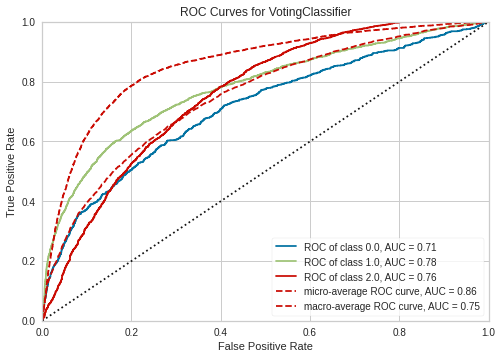

In [24]:
plot_model(estimator=blender, plot='auc')

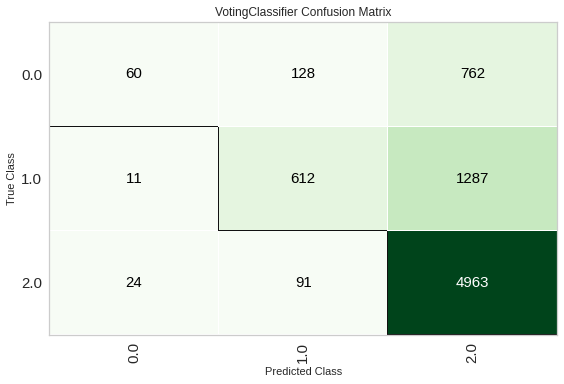

In [25]:
plot_model(estimator=blender, plot='confusion_matrix')

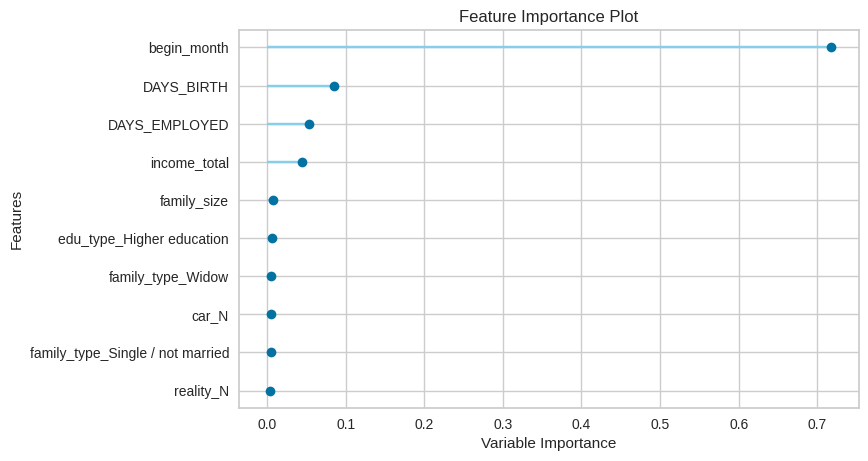

In [26]:
plot_model(estimator=gbc, plot='feature')

In [27]:
model = finalize_model(blender)

In [28]:
prep_pipe = get_config("prep_pipe")
prep_pipe.steps.append(['trained_model', blender])
prections = prep_pipe.predict_proba(test_data)
prections

array([[0.08513156, 0.15432205, 0.76054639],
       [0.06490721, 0.27264463, 0.66244815],
       [0.07128314, 0.13560981, 0.79310705],
       ...,
       [0.04170754, 0.14501328, 0.81327918],
       [0.16257201, 0.20267842, 0.63474957],
       [0.14499864, 0.25162405, 0.60337732]])

In [29]:
i, j, k = [], [], []
for row in prections:
  i.append(row[0])
  j.append(row[1])
  k.append(row[2])

len(i), len(j), len(k)

(10000, 10000, 10000)

In [31]:
submission['0'] = i
submission['1'] = j
submission['2'] = k
submission.head(10)

,index,0,1,2
0,26457,0.085132,0.154322,0.760546
1,26458,0.064907,0.272645,0.662448
2,26459,0.071283,0.135610,0.793107
3,26460,0.083295,0.111991,0.804715
4,26461,0.088954,0.143348,0.767698
5,26462,0.102953,0.141096,0.755951
6,26463,0.377082,0.604907,0.018011
7,26464,0.113344,0.199216,0.687440
8,26465,0.075629,0.173143,0.751228
9,26466,0.068329,0.175602,0.756069


In [33]:
submission.to_csv("/content/drive/MyDrive/data/creditcard/submission1.csv",index=False)